In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import *
import os

In [2]:
pathways = pd.read_csv('/home/m/Dropbox/Clostridium_paper/energy_and_carbon_metabolism_pathways/pathways_mereged_with_blast.csv')

In [65]:
pathways[pathways.pathway=='Energy conservation']

,Unnamed: 0,enzyme no,function,pathway,gene_name,C.ethanogenum,gene_id,CLJU
0,44,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2342,CAETHG_2342,CLJU_c02360
1,80,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2343,CAETHG_2343,CLJU_c02370
2,79,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2344,CAETHG_2344,CLJU_c02380
3,49,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2345,CAETHG_2345,CLJU_c02390
4,45,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2346,CAETHG_2346,CLJU_c02400
5,46,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2347,CAETHG_2347,CLJU_c02410
6,102,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2348,CAETHG_2348,CLJU_c02420
7,50,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2349,CAETHG_2349,CLJU_c02430
8,51,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2350,CAETHG_2350,CLJU_c02440
30,300,RR,Rnf complex,Energy conservation,Rnf,NaN,NaN,CLJU_c11350


In [66]:
omics = pd.read_excel('/home/m/Dropbox/Clostridium_paper/Omics_and_DESeq.xls')

In [67]:
pathways.sort_values(by='gene_id').to_csv('/home/m/Dropbox/Clostridium_paper/energy_and_carbon_metabolism_pathways/final_pathway_file.csv',
                                           sep='\t')

In [2]:
pathways=pd.read_csv('/home/m/Dropbox/Clostridium_paper/energy_and_carbon_metabolism_pathways/final_pathway_file.csv',
                                           sep='\t')

In [6]:
pathways.head()

,Unnamed: 0,Unnamed: 0.1,enzyme no,function,pathway,gene_name,C.ethanogenum,gene_id,CLJU
0,17,32.0,T1,Citrate synthase,Incomplete TCA cycle,NaN,CAETHG _2751,CAETHG _2751,CLJU_c06610
1,48,18.0,W2,Seleno formate dehydrogenase,Wood Ljungdahl pathway,Fdh,CAETHG_0084,CAETHG_0084,CLJU_c20040
2,49,22.0,E2,Aldehyde:Fd oxidoreductase,Ethanol fermentation pathway,AOR,CAETHG_0092,CAETHG_0092,CLJU_c20110
3,50,23.0,E2,Aldehyde:Fd oxidoreductase,Ethanol fermentation pathway,AOR,CAETHG_0102,CAETHG_0102,CLJU_c20210
4,51,24.0,H2,Other [FeFe] hydrogenases,Wood Ljungdahl pathway,Hyd,CAETHG_0110,CAETHG_0110,CLJU_c20290


In [4]:
infile = SeqIO.read('/home/m/genome_files/REF-seq_CLJU.gbk','gb')
genes =[]
name = []
product = []
func = []
strand = []
start = []
stop = []
aaseq = []
cds_seq = []
old_tag=[]

    #genome_seq_df = pd.DataFrame({'sequence':list(str(infile.seq))},index=range(1,len(str(infile.seq))+1))
for feature in infile.features:
    if feature.type == 'CDS' or feature.type == 'rRNA' or feature.type == 'tRNA':  #Only cares for coding sequences which are not pseudogenes
        genes.append(feature.qualifiers['locus_tag'][0])
        try: old_tag.append(feature.qualifiers['old_locus_tag'][0])
        except: old_tag.append('')
        try: name.append(feature.qualifiers['gene'][0])
        except: name.append('')
        product.append(feature.qualifiers['product'][0])
        cds_seq.append(feature.location.extract(infile.seq).tostring())
        if 'function' in feature.qualifiers:                       #not all genes have known functions
            func.append(feature.qualifiers['function'][0])
        else:
            func.append("N/A")
        try:
            aaseq.append(feature.qualifiers['translation'][0])
        except:
            aaseq.append("N/A")
        if feature.strand == 1:
            strand.append("plus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
        elif feature.strand == -1:
            strand.append("minus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
gene_df = pd.DataFrame({"gene_id": genes, 'old_gene_id':old_tag, "name": name, "product": product, "function": func, "strand": strand, "start": start, "stop": stop, "cds_seq":cds_seq,"aaseq": aaseq},
                          columns = ["gene_id", "old_gene_id","name", "function", "product", "strand", "start", "stop", "cds_seq","aaseq"])

/home/m/anaconda2/lib/python2.7/site-packages/Bio/Seq.py:341: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


In [8]:
pathways.drop('gene_id', axis=1, inplace=True)

In [11]:
pd.merge(gene_df[['gene_id', 'old_gene_id']], pathways, left_on='old_gene_id', right_on='CLJU')\
.to_csv('/home/m/Dropbox/Clostridium_paper/energy_and_carbon_metabolism_pathways/final_pathway_file_Refseq.csv', sep='\t')

In [68]:
merged = pd.merge(pathways, omics, left_on ='CLJU', right_on = 'old_gene_id')

In [69]:
merged=merged.rename(columns=lambda x: x.strip())

In [70]:
merged=merged[merged.gene_id_x.isnull()==False]

In [71]:
merged.padj_hf_h2c_ribo.fillna(1, inplace=True)
merged.padj_co_h2c_ribo.fillna(1, inplace=True)
merged.padj_co_hf_ribo.fillna(1, inplace=True)

In [72]:
merged_sig=merged[(merged.padj_hf_h2c_ribo<0.01) |(merged.padj_co_hf_ribo<0.01)]
merged_sig=merged_sig[(merged_sig.padj_hf_h2c_ribo.notnull()==True) 
                      &(merged_sig.padj_co_hf_ribo.notnull()==True) ]

In [73]:
merged.groupby('pathway')['pathway'].count()

pathway
2,3-butanediol fermentation pathway     6
Acetate fermentation pathway            2
Central pyruvatemetabolism              9
Energy conservation                    16
Ethanol fermentation pathway            5
Glycolysis/Gluconeogenesis             18
Incomplete TCA cycle                   21
Lactate fermentation pathway            1
Wood Ljungdahl pathway                 25
Name: pathway, dtype: int64

In [74]:
merged.head(70)

,Unnamed: 0,enzyme no,function,pathway,gene_name,C.ethanogenum,gene_id_x,CLJU,id,foldChange_co_hf_ribo,...,old_gene_id,av_ribo_rpkm_co,av_ribo_rpkm_hf,av_ribo_rpkm_h2c,av_rna_rpkm_co,av_rna_rpkm_hf,av_rna_rpkm_h2c,co_te,hf_te,h2c_te
0,44,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2342,CAETHG_2342,CLJU_c02360,CLJU_RS01155,0.208273,...,CLJU_c02360,4.794190,29.892983,16.705258,908.179054,2665.989396,564.203440,0.005279,0.011213,0.029609
1,80,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2343,CAETHG_2343,CLJU_c02370,CLJU_RS01160,0.374190,...,CLJU_c02370,1166.564769,4064.153200,1026.982778,1977.401076,4263.600620,1101.478585,0.589948,0.953221,0.932367
2,79,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2344,CAETHG_2344,CLJU_c02380,CLJU_RS01165,NaN,...,CLJU_c02380,575.730243,456.441467,408.044070,2593.056470,6318.398457,1249.487730,0.222028,0.072240,0.326569
3,49,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2345,CAETHG_2345,CLJU_c02390,CLJU_RS01170,NaN,...,CLJU_c02390,357.971274,613.454491,245.778536,2351.320880,5457.689957,1519.383725,0.152243,0.112402,0.161762
4,45,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2346,CAETHG_2346,CLJU_c02400,CLJU_RS01175,0.314366,...,CLJU_c02400,78.768262,327.784652,44.300125,2618.567224,6015.964375,1715.520313,0.030081,0.054486,0.025823
5,46,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2347,CAETHG_2347,CLJU_c02410,CLJU_RS01180,NaN,...,CLJU_c02410,1158.915630,2145.431588,824.940605,1931.699007,4211.268653,1149.637141,0.599946,0.509450,0.717566
6,102,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2348,CAETHG_2348,CLJU_c02420,CLJU_RS01185,NaN,...,CLJU_c02420,311.649426,451.876690,155.534516,1933.029276,4781.902631,1227.497975,0.161223,0.094497,0.126709
7,50,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2349,CAETHG_2349,CLJU_c02430,CLJU_RS01190,0.484702,...,CLJU_c02430,662.819873,1770.087607,473.376345,2126.874234,4862.066778,1379.040368,0.311640,0.364061,0.343265
8,51,A,AF1FO ATPase,Energy conservation,AtpIBEFHAGDC,CAETHG_2350,CAETHG_2350,CLJU_c02440,CLJU_RS01195,NaN,...,CLJU_c02440,191.816007,414.546865,152.589667,3580.941499,8771.942623,2465.529356,0.053566,0.047258,0.061889
10,52,G4,Fructose bisphosphate aldolase,Glycolysis/Gluconeogenesis,Aldo,CAETHG_2382,CAETHG_2382,CLJU_c02810,NaN,NaN,...,CLJU_c02810,928.634240,1536.691267,881.478526,746.688239,1007.438722,558.149251,1.243671,1.525345,1.579288


In [75]:
glycolysis = merged_sig[(merged_sig.pathway=='Glycolysis/Gluconeogenesis') |
                   (merged_sig.pathway=='Central pyruvatemetabolism')]
tca = merged_sig[merged_sig.pathway=='Incomplete TCA cycle']
wlp = merged_sig[merged_sig.pathway=='Wood Ljungdahl pathway']
energy = merged_sig[merged_sig.pathway=='Energy conservation']

AEB = merged_sig[(merged_sig.pathway=='Acetate fermentation pathway')|
            (merged_sig.pathway=='2,3-butanediol fermentation pathway')|
            (merged_sig.pathway=='Ethanol fermentation pathway')|
            (merged_sig.pathway=='Lactate fermentation pathway')]

In [76]:
all_groups = pd.concat([glycolysis,tca,wlp,energy,AEB])

In [77]:
#in order to sort the groups in a nice way. I expoerted in excel, sorted and then imported to make the figure
all_groups.to_excel('/home/m/Documents/temp.xls')

In [4]:
sorted_groups = pd.read_excel('/home/m/Documents/temp.xls')

In [7]:
sorted_groups.to_excel('/home/m/Dropbox/Clostridium_paper/sorted_pathways_for_paper.xls')

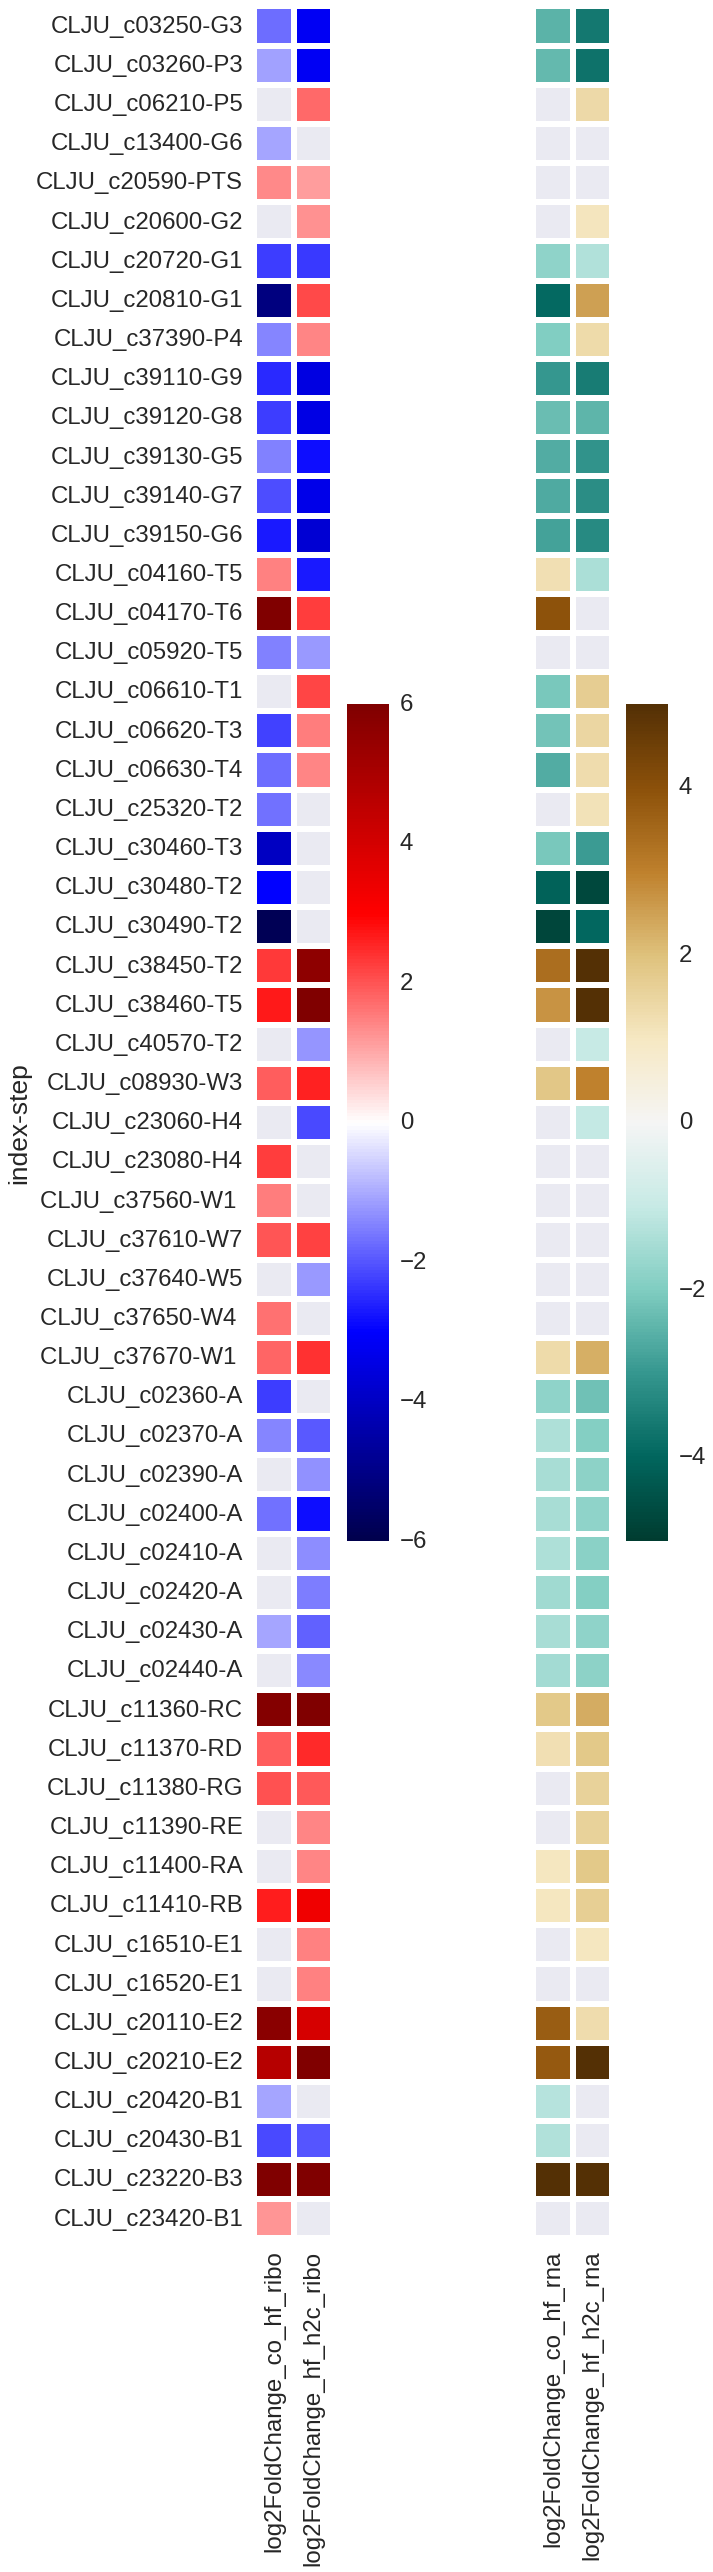

In [61]:
sns.set_context("poster", font_scale=1.5)
plotdf=sorted_groups[['log2FoldChange_co_hf_ribo', 'log2FoldChange_hf_h2c_ribo','log2FoldChange_co_hf_rna', 'log2FoldChange_hf_h2c_rna']]
plotdf.insert(0, 'index',sorted_groups.old_gene_id)
plotdf.insert(1, 'step', sorted_groups['enzyme no'])

#plotdf=plotdf.fillna(1)
plotdf.set_index(['index','step'], inplace=True)
#plotdf= plotdf.sort_values(by='log2FoldChange_co_hf_ribo', ascending=False)

###plotting### 

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(10,40))
plt.subplots_adjust(wspace=0)
sns.heatmap(plotdf[['log2FoldChange_co_hf_ribo', 'log2FoldChange_hf_h2c_ribo']], 
            square=True, cmap='seismic',linewidths=5, linecolor='white', ax=ax1,vmin = -6, vmax=6)

sns.heatmap(plotdf[['log2FoldChange_co_hf_rna', 'log2FoldChange_hf_h2c_rna']], 
            square=True, cmap='BrBG_r',linewidths=5, linecolor='white', ax=ax2, vmin = -5, vmax=4)

ax2.set_yticklabels([])
ax2.set_ylabel('')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/metabolic_groups_ribo_rna_seq_heatmap.pdf', bbox_inches='tight')


In [62]:
sorted_groups.columns

Index([u'Unnamed: 0', u'enzyme no', u'function', u'pathway', u'gene_name',
       u'C.ethanogenum', u'gene_id_x', u'CLJU', u'id',
       u'foldChange_co_hf_ribo', u'log2FoldChange_co_hf_ribo',
       u'padj_co_hf_ribo', u'foldChange_co_h2c_ribo',
       u'log2FoldChange_co_h2c_ribo', u'padj_co_h2c_ribo',
       u'foldChange_hf_h2c_ribo', u'log2FoldChange_hf_h2c_ribo',
       u'padj_hf_h2c_ribo', u'foldChange_co_hf_rna',
       u'log2FoldChange_co_hf_rna', u'padj_co_hf_rna',
       u'foldChange_co_h2c_rna', u'log2FoldChange_co_h2c_rna',
       u'padj_co_h2c_rna', u'foldChange_hf_h2c_rna',
       u'log2FoldChange_hf_h2c_rna', u'padj_hf_h2c_rna', u'gene_id_y',
       u'old_gene_id', u'av_ribo_rpkm_co', u'av_ribo_rpkm_hf',
       u'av_ribo_rpkm_h2c', u'av_rna_rpkm_co', u'av_rna_rpkm_hf',
       u'av_rna_rpkm_h2c', u'co_te', u'hf_te', u'h2c_te'],
      dtype='object')

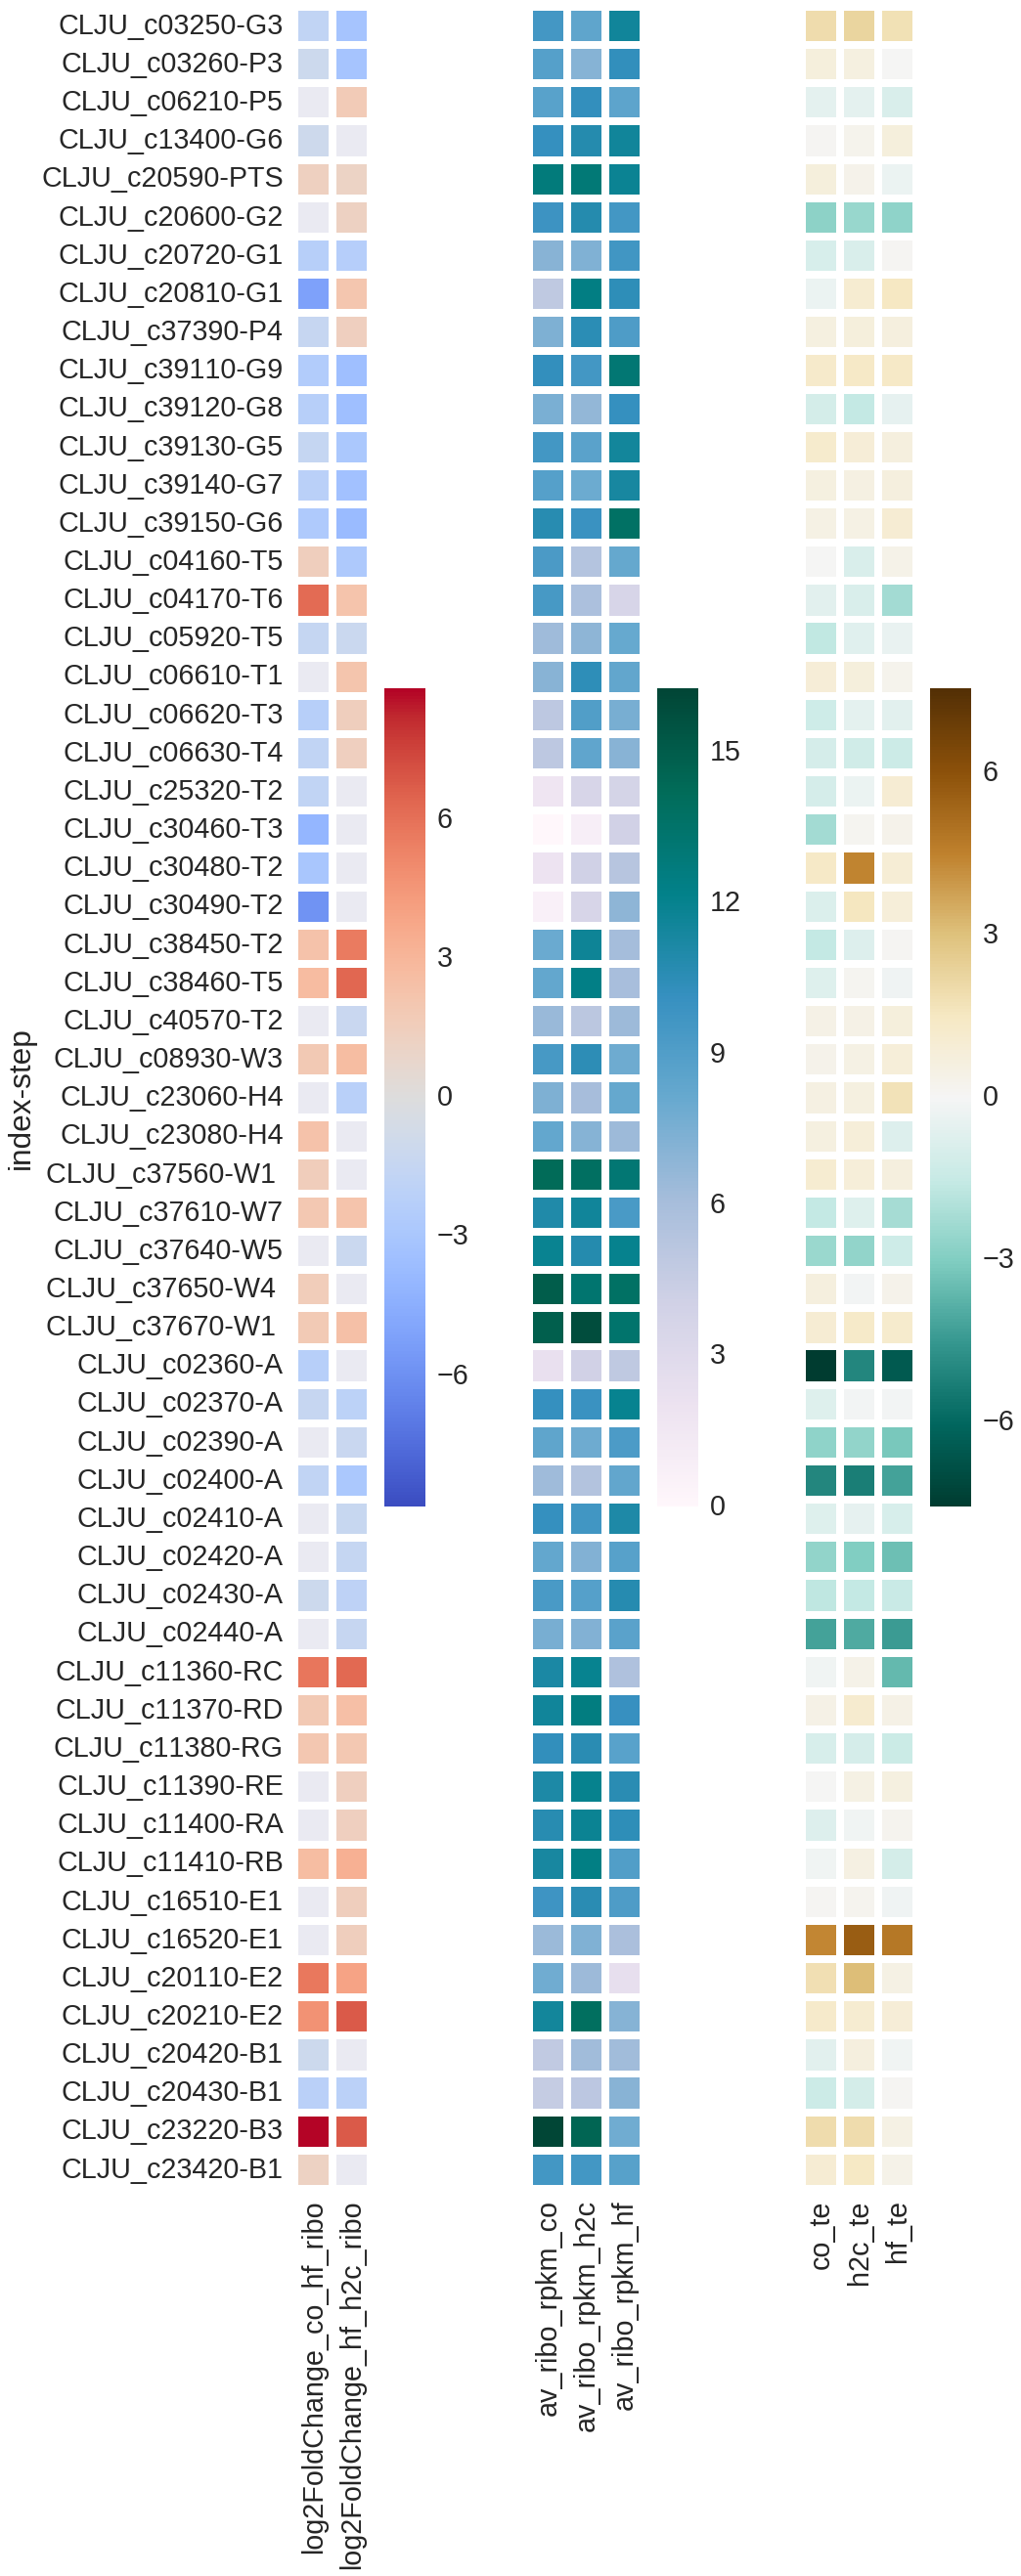

In [37]:
###df prep###
sns.set_context("poster",font_scale=1.8)
plotdf=sorted_groups 
plotdf.insert(0, 'index',sorted_groups.old_gene_id)
plotdf.insert(1, 'step', sorted_groups['enzyme no'])
#plotdf=plotdf.fillna(1)
plotdf.set_index(['index','step'], inplace=True)
###plotting### 
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1,figsize=(15,40))
plt.subplots_adjust(wspace=0)
fc = plotdf[['log2FoldChange_co_hf_ribo', 'log2FoldChange_hf_h2c_ribo']]
sns.heatmap(plotdf[['log2FoldChange_co_hf_ribo', 'log2FoldChange_hf_h2c_ribo']],
            square=True, cmap='coolwarm',linewidths=7, linecolor='white', ax=ax1,vmin = min(fc.min()), vmax=max(fc.max()))

ribo=plotdf[['av_ribo_rpkm_co', 'av_ribo_rpkm_h2c','av_ribo_rpkm_hf']]
#func = (np.min)
ribo=ribo[['av_ribo_rpkm_co', 'av_ribo_rpkm_h2c','av_ribo_rpkm_hf']].apply(np.log2)
ribo.insert(0, 'index',sorted_groups.old_gene_id)
ribo.insert(1, 'step', sorted_groups['enzyme no'])
ribo.set_index(['index','step'], inplace=True)
sns.heatmap(ribo,
            square=True, cmap='PuBuGn',linewidths=7, linecolor='white', ax=ax2,vmin = 0, vmax=max(ribo.max()))
te=plotdf[['co_te', 'h2c_te', 'hf_te']].apply(np.log2)
te.insert(0, 'index',sorted_groups.old_gene_id)
te.insert(1, 'step', sorted_groups['enzyme no'])
te.set_index(['index','step'], inplace=True)
sns.heatmap(te,
            square=True, cmap='BrBG_r',linewidths=7, linecolor='white', ax=ax3)#, vmin =-10, vmax=10)
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/metabolic_groups_ribo_rna_seq_heatmap_withbar.pdf', bbox_inches='tight')

In [82]:
merged_sig.groupby(['pathway'])['pathway'].count().to_frame().to_excel('/home/m/Dropbox/Clostridium_paper/energy_and_carbon_metabolism_pathways/pathway_gene_count.xls')